#computer vision

 It involves developing algorithms and techniques to help computers gain high-level understanding from digital images or videos.

By using convolution neural networks - in the domain of pictures

We can also perform binary and multiclass classification in Computer Vision.

Applications of Computer Vision:
* used for object detection , segmentation --> sections of an image
* tesla computer vision --> they have 8 cameras on the their self driving cars, they use computer vision to understand their images,they turn images into the vector spaces.
* tesla uses PyTorch to train their machine learning models.
* another thing is that tesla FSD breaks uses computer vision.

In [32]:
#computer vision inputs and outputs

w=224
h=224
c=3  #colour channels r,g,b

# Steps :

1. convert to numerical encoding, then to predicted output and then to actual output
2. the numerical encoded inputs are given to the algorithm and the output of the algorithm are actually the predicted outputs.
3. the algorithm that usually does this conversion is the CNN or the Convolutinal Neural Network
--> CNN works the best with the image data. There are differnt types of neural networks other than CNN as well.

if we encode any image, we might have 'batch_size , width, height, color channels'. these can vary

shape = [32 , 224 ,224 , 3]

then we have the output shape of 3 because in this example, we have 3 classes.

Note: we can have color channels first and color channels last, different libraries take different order but in the long term, we can use color channels last.

#what is a CNN?

--> architectures that are pretty good at recognising patterns in the images.

#architecture of a CNN:

1. input image
2. input layer --> takes in target images and preprocesses them for further layers
3. convolution layer --> learns the most important layers
4. hidden activation layers --> add non-linearity to the learned features
5. pooling layers --> reduces the dimensionality of learned image features
6. output layers/ linear layer --> takes learned features and outputs them in shape of target labels
7. output activation --> coverts the output logits to the predicted probabilities


# computer vision libraries in Pytorch


1. torchvision --> base domain library for CV
2. torchvision.Datasets --> get datasets and dataloading functions for CV
3. torchvision.models --> get pretrained CV models
4. torchvision.transforms --> functions for manipulating your vision data to be suitable for use.
5. torch.utils.data.Dataset --> base dataset class for PyTorch
6. torch.utils.data.DataLoader --> creates Python iterable over a dataset.



#FashionMNIST dataset

In [33]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [34]:
#using the built-in dataset

#setup the training data
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root = "data", #where to download the data to--
    train = True, #do we want the training dataset, if False we get the testing dataset
    download = True, #to get the dataset
    transform = torchvision.transforms.ToTensor(), #convert the data to tensors
    target_transform = None #how we want to transform the labels/targets
)


test_data = datasets.FashionMNIST(
    root="data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [35]:
#checking out the parameters or the attributes of the data
len(train_data) , len(test_data)

(60000, 10000)

In [36]:
#see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [37]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [38]:
class_to_index = train_data.class_to_idx
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [39]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [40]:
#checking the shape of the image
image.shape , label

(torch.Size([1, 28, 28]), 9)

In [41]:
print(f'image shape is: {image.shape} --> [color channel, height, width]')
print(f'image label is: {class_names[label]}')

image shape is: torch.Size([1, 28, 28]) --> [color channel, height, width]
image label is: Ankle boot


In [42]:
#visualising the data

image , label = train_data[0]
print(f'image shape: {image.shape}')

image shape: torch.Size([1, 28, 28])


In [43]:
#Pytorch expects the color channel in the last position/index.

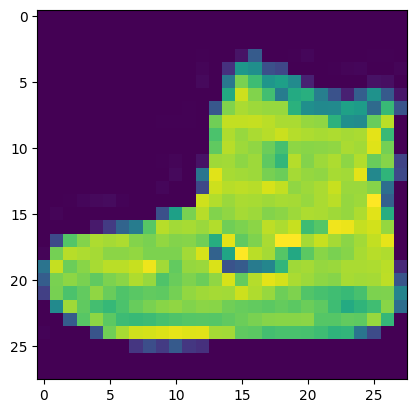

In [44]:
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

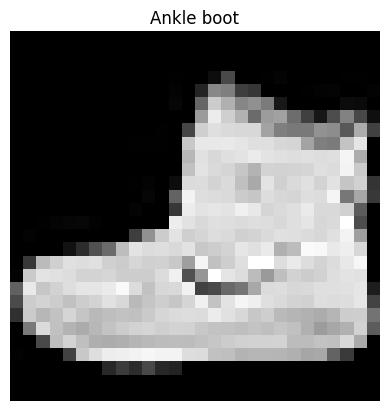

In [45]:
plt.imshow(image.squeeze() , cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)

34470
32561
52323
25720
38011
44461
20177
11289
6184
54553
38548
1409
18483
16507
20558
54491


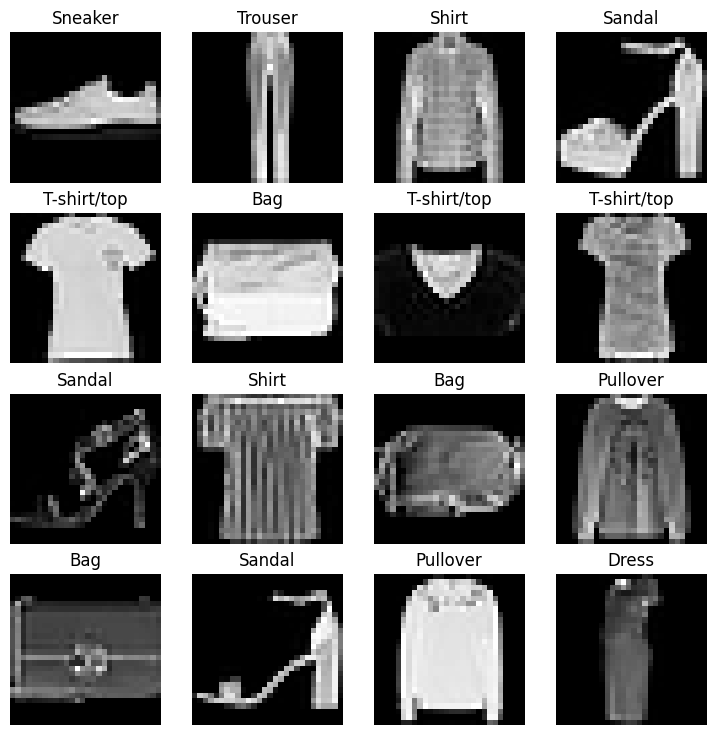

In [46]:
#plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows , cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data) , size=[1]).item()
  print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)